<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Classification%20with%20Tensorflow/Neural_Network_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classification

To practice multi-class classification we are going to build neural network to classify images of different items of clothing. We are going to use **fashion_mnist** dataset

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data is already sorted into training and testing dataset for us
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [2]:
# Show the first training example
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Test Sample:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

## Plot the images of the training set

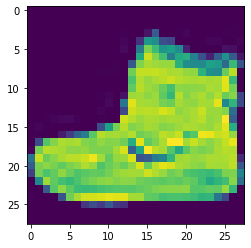

In [3]:
# Plot a single sample
plt.imshow(train_data[0])

In [4]:
# Check out samples labels
train_labels[0]

9

In [5]:
# Create a small list so we can index onto our training labels so they're human-readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Dress')

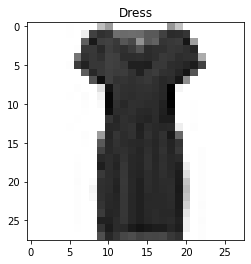

In [6]:
# Plot an example image and it's label
index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

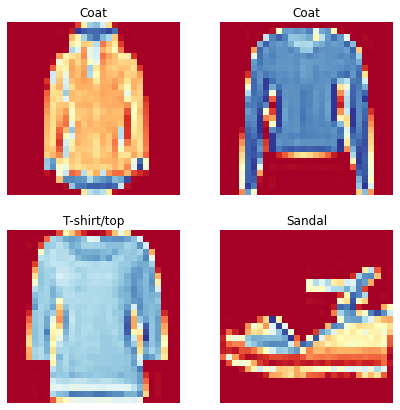

In [7]:
# Plot multiple random images od fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.RdYlBu)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building multi-class classification

We are going to build same architecture as binary class classification. However we are going to tweak a few things:

1. Input Shape = 28 x 28 (the shape of one image)
2. Output Shape = 10( one per class of clothing)
3. Loss = tf.keras.losses.CategoricalCrossentropy()
     * If your are one-hot encoded use CategoricalCrossentropy().
       ELSE if labels are integer form use SparseCategoricalCrossentropy()
4. Output Layer activation = Softmax

In [8]:
train_data[0].shape

(28, 28)

In [9]:
len(class_names)

10

In [11]:
# Flatten Shape demo
flatten_shape = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_shape.output_shape

(None, 784)

## Build the model

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),  # Without this layer there will be shape error                              
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(4, activation="relu"),
 tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                             
])

# 2. Compile the model

"""
Use this crossentropy loss function when there are two or more label classes. 
We expect labels to be provided in a one_hot representation. 
If you want to provide labels as integers, 
please use SparseCategoricalCrossentropy loss. There should be # classes 
floating point values per feature.
"""

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
non_norm_history = model.fit(train_data, train_labels, epochs=10,
                             validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1737 - accuracy: 0.1632 - val_loss: 1.8073 - val_accuracy: 0.1990
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7242 - accuracy: 0.2413 - val_loss: 1.6588 - val_accuracy: 0.3160
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2896 - val_loss: 1.6128 - val_accuracy: 0.2874
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6044 - accuracy: 0.3048 - val_loss: 1.5993 - val_accuracy: 0.3236
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5906 - accuracy: 0.3161 - val_loss: 1.5782 - val_accuracy: 0.3309
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5833 - accuracy: 0.3198 - val_loss: 1.5618 - val_accuracy: 0.3282
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5756 - accuracy: 0.3230 - val_loss: 1.5620 - val_accuracy:

In [13]:
# Check the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Check the min and max data of the training data
train_data.min(), train_data.max()

(0, 255)

## Feature Scaling(Normalization and Standardization)


In [16]:
# We can get our training and testing data between 0 & 1 by dividing by maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

## Building model with scaled data

In [17]:
# Set some random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(4, activation="relu"),
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                            
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
norm_history = model_2.fit(train_data_norm, train_labels,
                           epochs=10,
                           validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Comparing the normalized and non-normalized training model plot

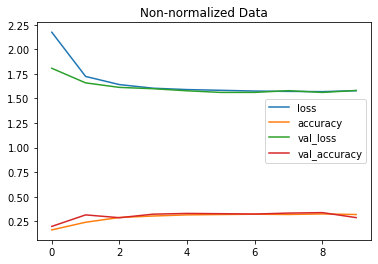

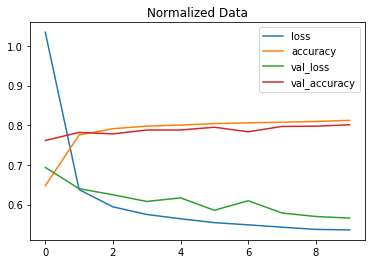

In [19]:
# Plot the non normalized data
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

# Plot the normalized data
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

## Finding the ideal Learning Rate

In [20]:
# Set some random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                               
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))

# 4. Fit the model
find_lr_history = model_3.fit(train_data_norm, train_labels,
                              epochs=40,
                              validation_data=(test_data_norm,test_labels),
                              callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

### Plot the learning rate decay curve

Text(0.5, 1.0, 'Finding the ideal Learning Rate')

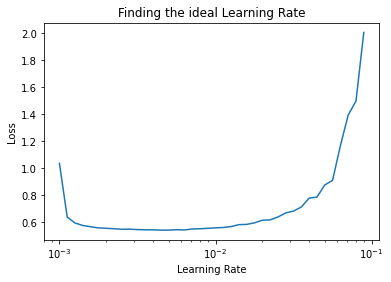

In [22]:
lrs = 1e-3 * (10**(tf.range(40)/20))

plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning Rate")

### Refit the model ideal learning rate

In [23]:
# Refit the model with the ideal learning rate

# Set soem random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(4, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")                               
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data_norm, train_labels,
                        epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluate our multi-class classification model

To evaluate our multi-class classification model we could:
 * Evaluate it's performance using other classification metrics
  (such as confusion matrix)
 * Assess some of it's prediction (through visualizations) 
 * Improve it's results (by training it for longer or changing the 
 architecture) 
 * Save aned export it for use in application 

In [24]:
# Create a confusion matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

 # Set label to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [27]:
# Make some prediction for our models
y_probs = model_4.predict(test_data_norm) # probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.5630322e-11, 3.5361438e-13, 2.6633888e-05, 4.6356213e-08,
        5.0949919e-05, 9.6119083e-02, 8.1778374e-08, 9.1868781e-02,
        4.0605213e-03, 8.0787385e-01],
       [3.4278551e-06, 1.2899066e-16, 9.5989138e-01, 2.0516254e-07,
        1.5329200e-02, 2.4531961e-13, 2.4142887e-02, 1.1383534e-28,
        6.3271978e-04, 4.4789296e-08],
       [6.1062885e-05, 9.9657673e-01, 4.3866724e-08, 3.3405675e-03,
        1.3249384e-05, 1.4382722e-21, 8.2790057e-06, 7.3235776e-18,
        5.4810769e-08, 4.9224015e-14],
       [7.5031639e-05, 9.9053687e-01, 4.2528774e-07, 9.2231641e-03,
        1.3623155e-04, 1.8275811e-18, 2.6808320e-05, 4.8124004e-14,
        1.4521493e-06, 2.2211248e-11],
       [7.2189853e-02, 1.5495733e-06, 2.5566927e-01, 1.0363132e-02,
        4.3541398e-02, 1.1069278e-13, 6.1693001e-01, 6.7545174e-23,
        1.3049209e-03, 1.2140450e-09]], dtype=float32)

In [28]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5630322e-11, 3.5361438e-13, 2.6633888e-05, 4.6356213e-08,
        5.0949919e-05, 9.6119083e-02, 8.1778374e-08, 9.1868781e-02,
        4.0605213e-03, 8.0787385e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [30]:
# Convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]  # Now they are same as our test labels

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

## Create the confusion matrix for evaluation

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

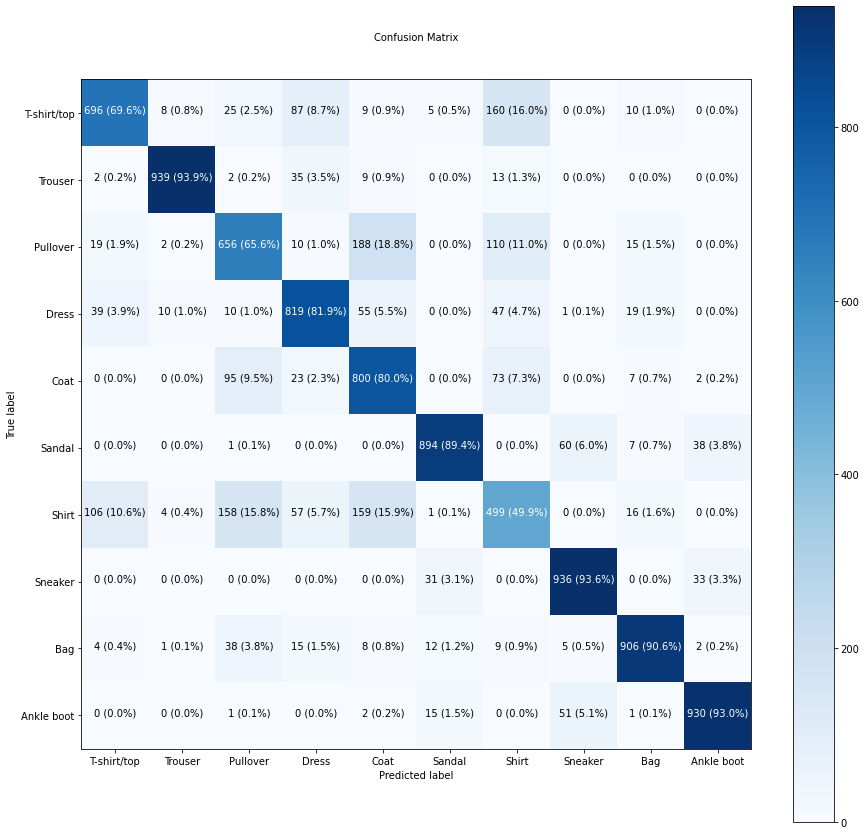

In [34]:
# make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

## Visualization of the data

Create a little function for
 * Plot a random image
 * Make a prediction on said image
 * Label the plot with the truth label & the predicted label

In [35]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up a random integer
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28)) # One image at a time with 28 X 28 size
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information(prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs), 
                                                   true_label),
                                                   color=color)    

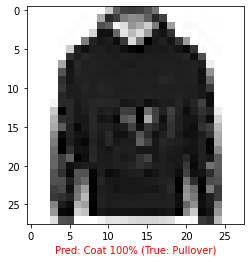

In [37]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)